## Section 1 

### Introduction introduction to the MNIST dataset: 
MNIST database consists of handwritten digits which will be used by image processing systems. This database consists of training images (60,000) and testing images (10,000). The resolution of each image is 28x28 and is displayed in grayscale. The handwritten images have digits from 0 to 9. There are 784 features of pixels of each image and label features indicating which digit it is values from 0-9.

In [ ]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To divide train and test set
from sklearn.model_selection import train_test_split

# To build the models
import xgboost 

## Model Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

from mlxtend.data import loadlocal_mnist

In [ ]:
data,label = loadlocal_mnist(images_path='/content/train-images.idx3-ubyte',
                             labels_path = '/content/train-labels.idx1-ubyte' )

In [ ]:
print('Dimensions:',data.shape)
print('\n1st row', data[0])

Dimensions: (60000, 784)

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 

In [ ]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(label))
print('Class distribution: %s' % np.bincount(label))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [ ]:
pixel_test,label_test = loadlocal_mnist(
      images_path='/content/t10k-images.idx3-ubyte', 
        labels_path='/content/t10k-labels.idx1-ubyte')

In [ ]:
print('Dimensions:',pixel_test.shape)
print('\n1st row', pixel_test[0])

Dimensions: (10000, 784)

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 

In [ ]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(label_test))
print('Class distribution: %s' % np.bincount(label_test))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [ ]:
col = []
for i in range(0,784):
    col.append('pixel_'+str(i))

In [ ]:
train = pd.DataFrame(data,columns=col)
test = pd.DataFrame(pixel_test,columns=col)

In [ ]:
array_train = np.array(train)
label_train = np.array(label)

array_test = np.array(test)
lab_test = np.array(label_test)

print(array_train.shape)
print(label_train.shape)
print(array_test.shape)
print(lab_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


[10263 24785 31270  7894 55521 33010 58708 18146 10229  5290]


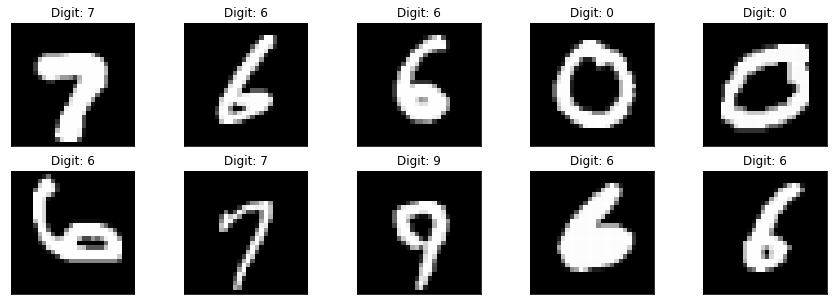

In [ ]:
s = np.random.choice(range(array_train.shape[0]), size=10, replace=False)  # Randomly select few samples

print(s)
plt.figure(figsize=(15,5))
for i,j in enumerate(s):   
    plt.subplot(2,5,i+1)                                # Subplot flag
    plt.imshow(np.array(array_train[j]).reshape(28,28))     # Plot the image
    plt.title('Digit: '+str(label_train[j]))              # Target of the image
    plt.xticks([])                                      # No X-Axis ticks
    plt.yticks([])                                      # No Y-Axis ticks
    plt.gray()       

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.20)  

## Section 2
### Building and Xgboost Model

In [ ]:
mat_train = xgboost.DMatrix(X_train, label=y_train)
mat_val = xgboost.DMatrix(X_val, label=y_val)

In [ ]:
params = {
    'max_depth': 5,                 
    'eta': 0.5,                     
    'eta_decay': 0.9,
    'min_eta': 0.05,
    'silent': 0,                    
    'objective': 'multi:softmax',  
    'num_class': 10,                
    'early_stopping_rounds': 10,
    'n_estimators': 5000
} 

In [ ]:
def eval_accuracy(preds,mat_train):
    labels = mat_train.get_label()
    return 'acc',metrics.accuracy_score(labels,preds)

In [ ]:
results = {}
model = xgboost.train(params,mat_train,num_boost_round=50,evals=[(mat_val,'Val')],
                      evals_result=results,feval=eval_accuracy)

[0]	Val-merror:0.187917	Val-acc:0.812083
[1]	Val-merror:0.13625	Val-acc:0.86375
[2]	Val-merror:0.113583	Val-acc:0.886417
[3]	Val-merror:0.100167	Val-acc:0.899833
[4]	Val-merror:0.087583	Val-acc:0.912417
[5]	Val-merror:0.07825	Val-acc:0.92175
[6]	Val-merror:0.072667	Val-acc:0.927333
[7]	Val-merror:0.066083	Val-acc:0.933917
[8]	Val-merror:0.06375	Val-acc:0.93625
[9]	Val-merror:0.059583	Val-acc:0.940417
[10]	Val-merror:0.057083	Val-acc:0.942917
[11]	Val-merror:0.0545	Val-acc:0.9455
[12]	Val-merror:0.052417	Val-acc:0.947583
[13]	Val-merror:0.0495	Val-acc:0.9505
[14]	Val-merror:0.046417	Val-acc:0.953583
[15]	Val-merror:0.04475	Val-acc:0.95525
[16]	Val-merror:0.043583	Val-acc:0.956417
[17]	Val-merror:0.043	Val-acc:0.957
[18]	Val-merror:0.0415	Val-acc:0.9585
[19]	Val-merror:0.040417	Val-acc:0.959583
[20]	Val-merror:0.039167	Val-acc:0.960833
[21]	Val-merror:0.038167	Val-acc:0.961833
[22]	Val-merror:0.037167	Val-acc:0.962833
[23]	Val-merror:0.036083	Val-acc:0.963917
[24]	Val-merror:0.035583	Val

In [ ]:
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test = test.values
mat_test = xgboost.DMatrix(x_test)

In [ ]:
mat_test

In [ ]:
preds = model.predict(mat_test,validate_features=False).astype('int')
print(preds.shape)
preds

(10000,)


array([7, 2, 1, ..., 4, 5, 6])

Predicted value: 2
Actual value: 2


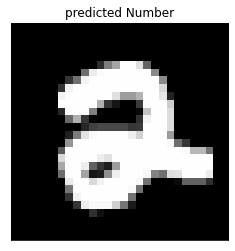

In [ ]:
i=222
img = array_test[i]
img = np.reshape(img, (28, 28) )
plt.title('predicted Number')
plt.xticks([])
plt.yticks([])
plt.imshow(img)
print("Predicted value: " + str(preds[i]))
print("Actual value: " + str(label_test[i]))

In [ ]:
print(classification_report(lab_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Section 3

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


[10146 40244  3187  9291 46519   151  3749  4050 51288 43108]


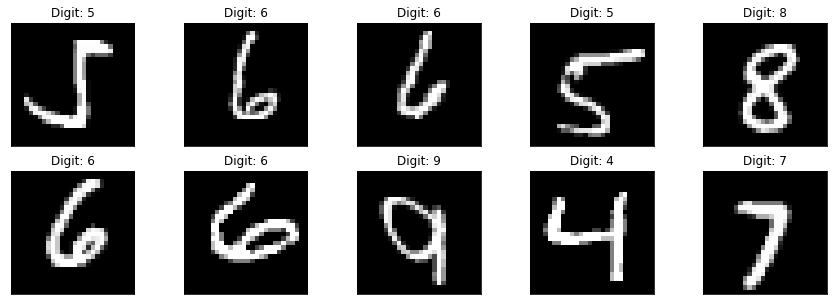

In [ ]:
import matplotlib.pyplot as plt    # For plotting 
%matplotlib inline                 

s = np.random.choice(range(array_train.shape[0]), size=10, replace=False)  # Randomly select few samples

print(s)
plt.figure(figsize=(15,5))
for i,j in enumerate(s):   
    plt.subplot(2,5,i+1)                                # Subplot flag
    plt.imshow(np.array(array_train[j]).reshape(28,28))     # Plot the image
    plt.title('Digit: '+str(label_train[j]))              # Target of the image
    plt.xticks([])                                      # No X-Axis ticks
    plt.yticks([])                                      # No Y-Axis ticks
    plt.gray()   

In [ ]:
# Check the dimensions of the arrays
print('x_train shape: {}'.format(array_train.shape))
print('y_train shape: {}'.format(label_train.shape))
print('x_test shape:  {}'.format(array_test.shape))
print('y_test shape:  {}'.format(lab_test.shape))

x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape:  (10000, 784)
y_test shape:  (10000,)


In [ ]:
img_rows, img_cols = 28, 28

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = array_train.reshape(array_train.shape[0], 1, img_rows, img_cols)
    x_test = array_test.reshape(array_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = array_train.reshape(array_train.shape[0], img_rows, img_cols, 1)
    x_test = array_test.reshape(array_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Convert the class labels to one-hot vectors using '' to_categorical ".


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(label_train)
y_test = to_categorical(label_test)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
def CNN_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=( 28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = CNN_model()

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split= 0.2, batch_size=200, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 20s 422us/step - loss: 0.0746 - accuracy: 0.9774 - val_loss: 0.0617 - val_accuracy: 0.9818
Epoch 2/5
48000/48000 [==============================] - 20s 418us/step - loss: 0.0563 - accuracy: 0.9830 - val_loss: 0.0533 - val_accuracy: 0.9838
Epoch 3/5
48000/48000 [==============================] - 20s 419us/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0488 - val_accuracy: 0.9863
Epoch 4/5
48000/48000 [==============================] - 20s 416us/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0479 - val_accuracy: 0.9855
Epoch 5/5
48000/48000 [==============================] - 20s 416us/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0445 - val_accuracy: 0.9864


In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

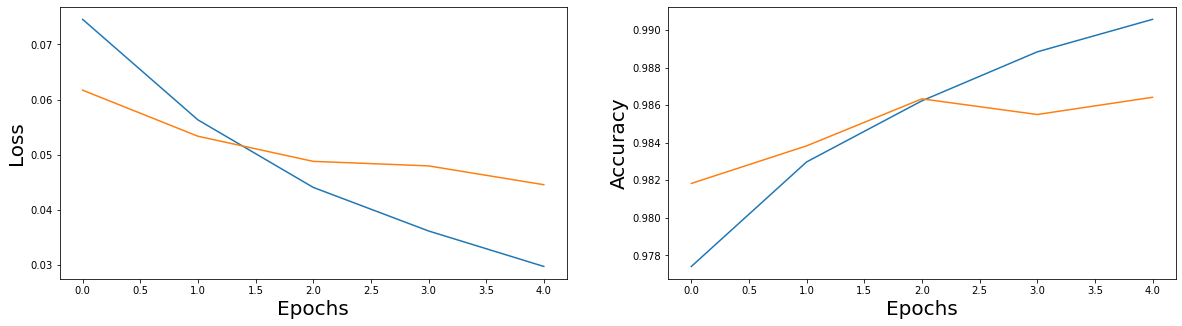

In [ ]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.plot(train_acc)
plt.plot(val_acc);

In [ ]:
predictions = model.predict(x_test)
predicted_vals = np.argmax(predictions, axis = 1)

Predicted vals: 4
Actual vals: 4


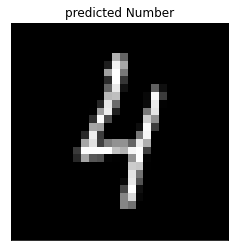

In [ ]:
i=227
img = array_test[i]
img = np.reshape(img, (28, 28) )
plt.title('predicted Number')
plt.xticks([])
plt.yticks([])
plt.imshow(img)
print("Predicted vals: " + str(predicted_vals[i]))
print("Actual vals: " + str(label_test[i]))

In [ ]:
print("Accuracy for Convolution Neural Network is :",accuracy_score(label_test,predicted_vals))
print(classification_report(label_test,predicted_vals))

Accuracy for Convolution Neural Network is : 0.9884
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Simple Neural Network

In [ ]:
model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(200, kernel_initializer='uniform', input_dim = 784, activation='relu')) # Add a dense layer 
model.add(Dense(10, kernel_initializer='uniform', activation='softmax')) # Add output layer
# Setting learning and momentum
# Adam is the optimizer which is the state of the art Gradient Descent variation. 
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer=adam,                  # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [ ]:
nb_epochs = 10
history = model.fit(array_train, y_train, epochs=nb_epochs, batch_size=128, validation_split=0.1) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.7882 - accuracy: 0.9007 - val_loss: 0.1950 - val_accuracy: 0.9465
Epoch 2/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.1604 - accuracy: 0.9555 - val_loss: 0.1402 - val_accuracy: 0.9617
Epoch 3/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.1091 - accuracy: 0.9682 - val_loss: 0.1425 - val_accuracy: 0.9627
Epoch 4/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.0980 - accuracy: 0.9706 - val_loss: 0.1431 - val_accuracy: 0.9673
Epoch 5/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.0980 - accuracy: 0.9718 - val_loss: 0.1967 - val_accuracy: 0.9582
Epoch 6/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.0926 - accuracy: 0.9749 - val_loss: 0.1717 - val_accuracy: 0.9605
Epoch 7/10
54000/54000 [==============================] - 2s 30us/ste

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

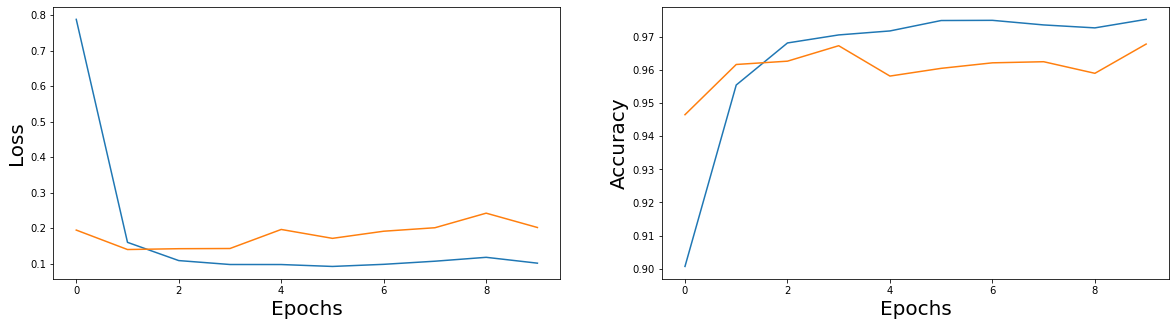

In [ ]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.plot(train_acc)
plt.plot(val_acc);

In [ ]:
predictions = model.predict(array_test)
predicted_vals = np.argmax(predictions, axis = 1)

Predicted vals: 5
Actual vals: 5


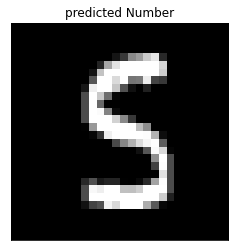

In [ ]:
i=240
img = array_test[i]
img = np.reshape(img, (28, 28) )
plt.title('predicted Number')
plt.xticks([])
plt.yticks([])
plt.imshow(img)
print("Predicted vals: " + str(predicted_vals[i]))
print("Actual vals: " + str(label_test[i]))

In [ ]:
print("Accuracy for simple Neural Network is :",accuracy_score(label_test,predicted_vals))
print("Classification Report :",classification_report(label_test,predicted_vals))

Accuracy for simple Neural Network is : 0.9644
Classification Report :               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.94      0.96      0.95       892
           6       0.99      0.96      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## Conclusion :

From the above analysis of MNIST dataset with XGboost, CNN and Multi-layer Neural Network all the performing well with accuracies 97 %, 99 % and 96.44%.
Clearly shows that CNN performs better compared to Simple Neural network and XGboost. Where as XGboost performs slightly better compared to Simple MLP network.